In [156]:
import pandas as pd
import numpy as np
from transformers import RobertaTokenizer, RobertaModel
import torch
import matplotlib.pyplot as plt


In [2]:
#Loading the training file
file_path = '/Users/diana/Desktop/isear-train.xlsx'
custom_headers = ['Emotions', 'Text']
df = pd.read_excel(file_path, skiprows=1, header=None, names=custom_headers)

In [3]:
label_encoding = {'anger': 0, 'disgust': 1, 'fear': 2, 'guilt': 3, 'joy': 4, 'sadness': 5, 'shame': 6}
y = df['Emotions'].values
y_train_encoded = np.array([label_encoding[label] for label in y])
print("Encoded labels:", y, y_train_encoded[:20])

Encoded labels: ['sadness' 'disgust' 'fear' ... 'sadness' 'disgust' 'fear'] [5 1 2 6 0 6 1 4 6 4 1 0 0 4 2 4 6 2 1 5]


In [4]:
#conda install torch transformers openpyxl


In [5]:
pip  install torch

Note: you may need to restart the kernel to use updated packages.


In [6]:
print (type(df['Text']))
strings = []
for index, sentence in enumerate(df['Text']):
    emotion_label = df['Emotions'][index]
    strings.append (sentence)
print (strings[0:3])

<class 'pandas.core.series.Series'>
['Losing my girlfriend who made an end to our relationship. By this I lost an important source of support, certainty and joyful moments. I cried very intensly when that happened.', '[ No response.]', 'Staying alone in a dark place.']


In [90]:
#Creating BERT embeddings for the TRAINSET
bert_model = RobertaModel.from_pretrained('roberta-base', output_hidden_states=True)
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
#model = BertModel.from_pretrained('bert-base-uncased').to(device)

def get_sentence_embeddings(text_list, batch_size=32):
    all_embeddings = []

    # Process each sublist separately
    for i in range(0, len(text_list), batch_size):
        batch = text_list[i:i + batch_size]
        #print(f"Processing batch from index {i} to {i + len(batch)}")
        inputs = tokenizer(batch, return_tensors="pt", padding=True, truncation=True, max_length=512).to(device)
        
        with torch.no_grad():
            outputs = bert_model(**inputs)

        # Extract the hidden state of the CLS token (first token)
        cls_embeddings = outputs.hidden_states[-1][:, 0, :]  # the last layer's CLS token state
        all_embeddings.append(cls_embeddings)  

    # Concatenate all batch embeddings
    sentence_embeddings = torch.cat(all_embeddings, dim=0)
    
    return sentence_embeddings

# Example usage with strings_dev
# sentence_embeddings_dev = get_sentence_embeddings(strings_dev)
# print("Sentence embeddings shape:", sentence_embeddings_dev.shape)

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [91]:
#sentence_embeddings = '/Users/diana/Desktop/TL/sentence_embeddings.pt'
#sentence_embeddings = torch.load(sentence_embeddings)
sentence_embeddings = get_sentence_embeddings(strings)



Processing batch from index 0 to 32
Processing batch from index 32 to 64
Processing batch from index 64 to 96
Processing batch from index 96 to 128
Processing batch from index 128 to 160
Processing batch from index 160 to 192
Processing batch from index 192 to 224
Processing batch from index 224 to 256
Processing batch from index 256 to 288
Processing batch from index 288 to 320
Processing batch from index 320 to 352
Processing batch from index 352 to 384
Processing batch from index 384 to 416
Processing batch from index 416 to 448
Processing batch from index 448 to 480
Processing batch from index 480 to 512
Processing batch from index 512 to 544
Processing batch from index 544 to 576
Processing batch from index 576 to 608
Processing batch from index 608 to 640
Processing batch from index 640 to 672
Processing batch from index 672 to 704
Processing batch from index 704 to 736
Processing batch from index 736 to 768
Processing batch from index 768 to 800
Processing batch from index 800 t

In [92]:
sentence_embeddings_roberta = '/Users/diana/Desktop/TL/ROBERTA_sentence_embeddings.pt'


In [93]:
print (sentence_embeddings.shape)

torch.Size([5366, 768])


In [94]:
#Devset BERT
file_path_dev = '/Users/diana/Desktop/isear-validation.xlsx'
custom_headers_dev = ['Emotions_dev', 'Text_dev']
df = pd.read_excel(file_path_dev, skiprows=1, header=None, names=custom_headers_dev)

print (type(df['Text_dev']))
strings_dev = []
for index, sentence in enumerate(df['Text_dev']):
    emotion_label_dev = df['Emotions_dev'][index]
    strings_dev.append (sentence)
print (strings_dev[0:3])


y_dev = df['Emotions_dev'].values
y_dev_encoded = np.array([label_encoding[label] for label in y_dev])
y_dev_tensor = torch.tensor (y_dev_encoded)
#print (len (strings_dev))
#print (y_dev_tensor.shape)


<class 'pandas.core.series.Series'>
['[ Laziness makes one sad.]', 'I had to leave my girlfriend for 4 weeks because of my studies. This happens frequently. The last 24 hours before my departure are always very depressing.', 'I promised to join a meeting but did not turn up as I did not want to do the work.']
1150
torch.Size([1150])


In [95]:
#Testset BERT
file_path_test = '/Users/diana/Desktop/isear-test.xlsx'
custom_headers_test = ['Emotions_test', 'Text_test']
df = pd.read_excel(file_path_test, skiprows=1, header=None, names=custom_headers_test)

strings_test = []
for index, sentence in enumerate(df['Text_test']):
    emotion_label_test = df['Emotions_test'][index]


strings_test = df['Text_test'].tolist()
print (strings_test)

y_test = df['Emotions_test'].values
y_test_encoded = np.array([label_encoding[label] for label in y_test])
y_test_encoded = torch.tensor (y_test_encoded)
print (len (df['Text_test']))



['My first feeling of falling in love.  Coming across a person who made me feel love, happiness, joy, giving me a new and beautiful future, who made me dream.', 'When I saw that the mark I had obtained in an exam was a good one.', 'When I learnt that I had been admitted to the university.', 'In a hurry to get to lectures and the car would not start.', 'Not attending school, when  am not sick - but in need of mental rest. Staff on your return query your \\sickness\\" - it is easier á', 'When I went up the stairs in a high, dark house full of shadows, passed a door and had the feeling that someone or something was behind me, although I knew I was alone.', "At my grandfather's funeral.  I remembered that the thing he liked and respected most was earth, I thought that he had attained what he wanted and was not separated from it any longer.", 'When I lost the notes of the lecturer I had borrowed from my friend.', 'My friend was so intoxicated that the police came and took him away, and they

In [96]:
#devset embeddings
sentence_embeddings_dev = get_sentence_embeddings(strings_dev)
# Print the shape of the embeddings
print("Sentence embeddings shape:", sentence_embeddings_dev.shape)

Processing batch from index 0 to 32
Processing batch from index 32 to 64
Processing batch from index 64 to 96
Processing batch from index 96 to 128
Processing batch from index 128 to 160
Processing batch from index 160 to 192
Processing batch from index 192 to 224
Processing batch from index 224 to 256
Processing batch from index 256 to 288
Processing batch from index 288 to 320
Processing batch from index 320 to 352
Processing batch from index 352 to 384
Processing batch from index 384 to 416
Processing batch from index 416 to 448
Processing batch from index 448 to 480
Processing batch from index 480 to 512
Processing batch from index 512 to 544
Processing batch from index 544 to 576
Processing batch from index 576 to 608
Processing batch from index 608 to 640
Processing batch from index 640 to 672
Processing batch from index 672 to 704
Processing batch from index 704 to 736
Processing batch from index 736 to 768
Processing batch from index 768 to 800
Processing batch from index 800 t

In [103]:
#testset
sentence_embeddings_test = get_sentence_embeddings(strings_test)
print("Sentence embeddings shape:", sentence_embeddings_test.shape)

Processing batch from index 0 to 32
Processing batch from index 32 to 64
Processing batch from index 64 to 96
Processing batch from index 96 to 128
Processing batch from index 128 to 160
Processing batch from index 160 to 192
Processing batch from index 192 to 224
Processing batch from index 224 to 256
Processing batch from index 256 to 288
Processing batch from index 288 to 320
Processing batch from index 320 to 352
Processing batch from index 352 to 384
Processing batch from index 384 to 416
Processing batch from index 416 to 448
Processing batch from index 448 to 480
Processing batch from index 480 to 512
Processing batch from index 512 to 544
Processing batch from index 544 to 576
Processing batch from index 576 to 608
Processing batch from index 608 to 640
Processing batch from index 640 to 672
Processing batch from index 672 to 704
Processing batch from index 704 to 736
Processing batch from index 736 to 768
Processing batch from index 768 to 800
Processing batch from index 800 t

In [97]:
torch.save(sentence_embeddings, "sentence_embeddings.pt")
# To load the embeddings later
loaded_embeddings = torch.load("sentence_embeddings.pt")

In [98]:
print (type (sentence_embeddings))
y_train_tensor = torch.tensor(y_train_encoded)
y_test_tensor = torch.tensor(y_test_encoded)
print (y_dev_tensor.shape, y_test_tensor.shape,y_train_tensor.shape ) 

<class 'torch.Tensor'>
torch.Size([1150]) torch.Size([1150]) torch.Size([5366])


/var/folders/mh/2g8pjxqx2dldlw8dltkfmgvm0000gn/T/ipykernel_36481/1177048907.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test_tensor = torch.tensor(y_test_encoded)


In [188]:
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Convert to PyTorch tensors
embeddings = torch.tensor(sentence_embeddings, dtype=torch.float32).to(device)
labels = torch.tensor(y_train_tensor, dtype=torch.long).to(device)

embeddings_dev = torch.tensor(sentence_embeddings_dev, dtype=torch.float32)
labels_dev = torch.tensor(y_dev_encoded, dtype=torch.long)

embeddings_test = torch.tensor(sentence_embeddings_test, dtype=torch.float32)
labels_test = torch.tensor(y_test_tensor, dtype=torch.long)

# Create a dataset and dataloader
dataset = TensorDataset(embeddings, labels)
dataset_dev = TensorDataset(embeddings_dev,labels_dev)
dataset_test = TensorDataset(embeddings_test,labels_test)


train_loader = DataLoader(dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(dataset_dev, batch_size=32, shuffle=False)
test_loader = DataLoader(dataset, batch_size=32, shuffle=False)


class SimpleNN(nn.Module):
    def __init__(self, input_dim, hidden_dim1, output_dim):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.bn1 = nn.BatchNorm1d(hidden_dim1)
        self.relu1 = nn.LeakyReLU()
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.bn2 = nn.BatchNorm1d(hidden_dim2)
        self.relu2 = nn.LeakyReLU()
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(hidden_dim2, output_dim)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        return x
input_dim = 768  # Dimension of BERT embeddings
hidden_dim1 = 32
hidden_dim2 = 32
output_dim = 7  # Number of emotion classes

/var/folders/mh/2g8pjxqx2dldlw8dltkfmgvm0000gn/T/ipykernel_36481/1896033688.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  embeddings = torch.tensor(sentence_embeddings, dtype=torch.float32).to(device)
/var/folders/mh/2g8pjxqx2dldlw8dltkfmgvm0000gn/T/ipykernel_36481/1896033688.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(y_train_tensor, dtype=torch.long).to(device)
/var/folders/mh/2g8pjxqx2dldlw8dltkfmgvm0000gn/T/ipykernel_36481/1896033688.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  embeddings_dev

In [192]:
simp_model = SimpleNN(input_dim, hidden_dim1, output_dim).to(device)
lossf = nn.CrossEntropyLoss()
optimizer = optim.AdamW(simp_model.parameters(), lr=0.0001, weight_decay=1e-6) # L2 regularization #

In [204]:
num_epochs = 250

# Initialize lists to store losses
train_losses = []
val_losses = []
test_losses = []

for epoch in range(num_epochs):
    # Training phase
    simp_model.train()
    train_loss = 0.0
    
    for batch_embeddings, batch_labels in train_loader:
        # Forward pass
        outputs = simp_model(batch_embeddings)
        loss = lossf(outputs, batch_labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
    
    # Calculate average training loss
    train_loss /= len(train_loader)
    train_losses.append(train_loss)
    
    # Validation phase
    simp_model.eval()
    val_loss = 0.0
    
    with torch.no_grad():
        for batch_embeddings, batch_labels in val_loader:
            outputs = simp_model(batch_embeddings)
            loss = lossf(outputs, batch_labels)
            val_loss += loss.item()
    
    # Calculate average validation loss
    val_loss /= len(val_loader)
    val_losses.append(val_loss)
    
    # Test phase
    simp_model.eval()
    test_loss = 0.0
    
    with torch.no_grad():
        for batch_embeddings, batch_labels in test_loader:
            outputs = simp_model(batch_embeddings)
            loss = lossf(outputs, batch_labels)
            test_loss += loss.item()
    
    # Calculate average test loss
    test_loss /= len(test_loader)
    test_losses.append(test_loss)
    
    #print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Test Loss: {test_loss:.4f}')

In [202]:
from sklearn.metrics import f1_score

simp_model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for batch_embeddings, batch_labels in test_loader:
        outputs = simp_model(batch_embeddings)
        _, predicted = torch.max(outputs.data, 1)
        total += batch_labels.size(0)
        correct += (predicted == batch_labels).sum().item()
    f1 = f1_score(predicted , batch_labels, average='weighted')
    f1_macro = f1_score(predicted , batch_labels, average='macro')
    print (f1, f1_macro)
    print(f'Accuracy of the model on the data: {100 * correct / total:.2f}%')

0.7727272727272727 0.761904761904762
Accuracy of the model on the data: 84.70%


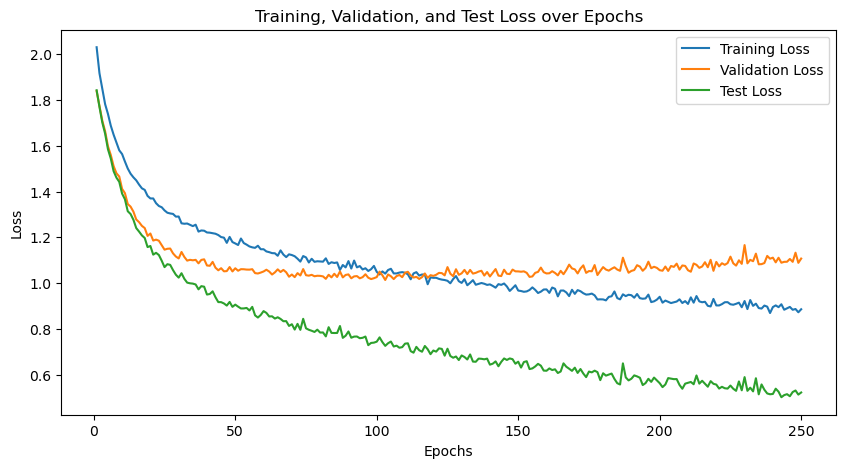

In [200]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss')
plt.plot(range(1, num_epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training, Validation, and Test Loss over Epochs')
plt.legend()
plt.show()


In [ ]:
pip install shap

In [201]:
"""import shap

dataiter = iter(test_loader)
test_data, test_labels = dataiter.next()

background_data = embeddings[:100]  # 100 instances from the training set

explainer = shap.DeepExplainer(simp_model, background_data)

# Generate SHAP values
test_data.requires_grad = True
shap_values = explainer.shap_values(test_data)"""

'import shap\n\ndataiter = iter(test_loader)\ntest_data, test_labels = dataiter.next()\n\nbackground_data = embeddings[:100]  # 100 instances from the training set\n\nexplainer = shap.DeepExplainer(simp_model, background_data)\n\n# Generate SHAP values\ntest_data.requires_grad = True\nshap_values = explainer.shap_values(test_data)'